In [1]:
from sklearn.cluster import DBSCAN
from shapely.geometry import MultiPoint,Point,Polygon
import pandas as pd
import geopandas as gp
from shapely import wkt
import numpy as np
import matplotlib.pyplot as plt
from watertap3.truck_pipe_cost_functions import pipe_costing

from sklearn.cluster import DBSCAN
from shapely import wkt

In [48]:
bw_df = pd.read_csv('/Users/mhardika/Documents/AMO/GeoToolAll_Methods/Water Source Data/Brackish/brackish_sites_baseline_dwi_5Feb23.csv')
us_counties = gp.read_file(r'\Users\mhardika\Documents\AMO\GeoToolAll_Methods\GeoData\US_County_Boundaries\US_CountyBndrys.shp')
us_counties = us_counties.to_crs("EPSG:4326")
us_states = gp.read_file(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files\tl_rd22_us_state\tl_rd22_us_state.shp')
us_states = us_states.to_crs("EPSG:4326")
state_code = '48'

bw_cluster_kmeans = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\Analysis Data Files\clustering_results\TX\tx_bw_kmeans.csv')

In [25]:
state_geo = us_counties.loc[us_counties['STATEFP']==state_code]
state_border = us_states.loc[us_states['STATEFP']==state_code]

In [26]:
bw_long = bw_df[bw_df['state_alpha']=='TX']['Longitude']
bw_lat = bw_df[bw_df['state_alpha']=='TX']['Latitude']

bw_geometry = [Point(xy) for xy in zip(bw_long,bw_lat)]
bw_geo_df = gp.GeoDataFrame(geometry = bw_geometry, crs='EPSG:4326')
bw_geo_df.geometry = bw_geo_df.geometry.to_crs('EPSG:4326')
bw_geo_df = bw_geo_df.assign(county_nm = bw_df[bw_df['state_alpha'] =='TX']['county_nm'].values)

[]

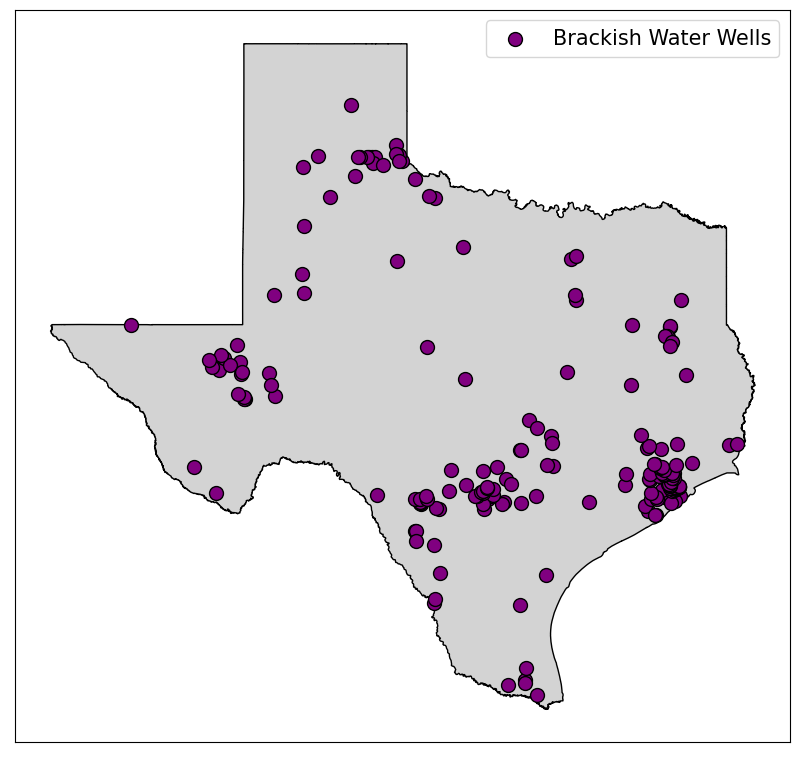

In [47]:
fig, (ax) = plt.subplots(figsize = (10,10))
# states[states['NAME'] == 'Texas'].plot(ax=ax,figsize=(20, 20))

state_border.plot(ax=ax,facecolor ='lightgrey',edgecolor ='black')
# state_geo.plot(ax=ax,facecolor ='none',edgecolor ='black',alpha = 0.5)

bw_geo_df.plot(ax=ax, color='purple', markersize = 100,edgecolor ='black',label='Brackish Water Wells')
ax.legend(fontsize=15)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])


[]

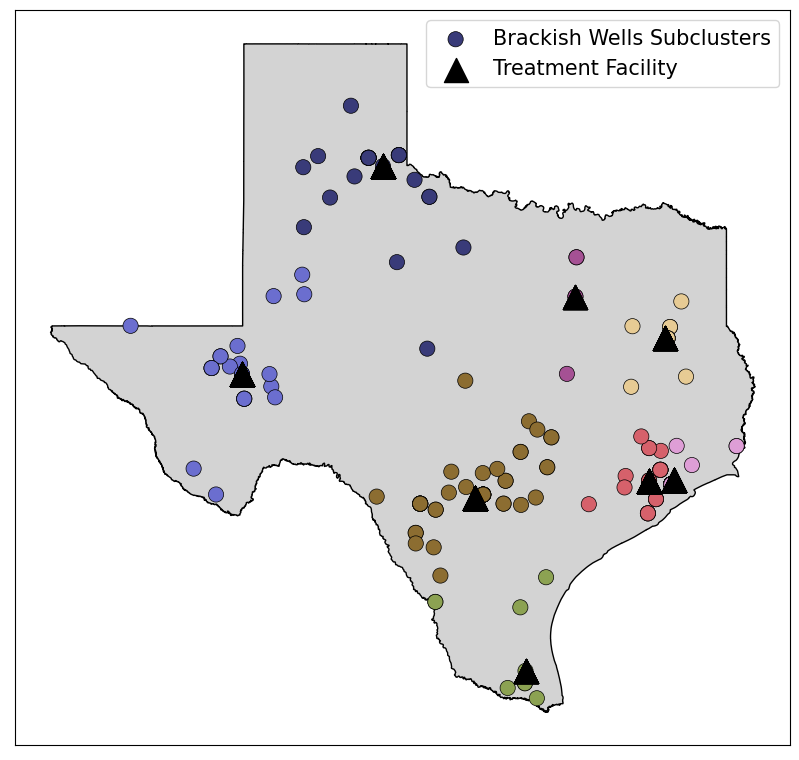

In [59]:
fig, (ax) = plt.subplots(figsize = (10,10))
# states[states['NAME'] == 'Texas'].plot(ax=ax,figsize=(20, 20))

state_border.plot(ax=ax,facecolor ='lightgrey',edgecolor ='black')
# state_geo.plot(ax=ax,facecolor ='none',edgecolor ='black',alpha = 0.5)

ax.scatter(bw_cluster_kmeans['subcluster_long'].values, bw_cluster_kmeans['subcluster_lat'].values, 
                c=bw_cluster_kmeans['cluster_id'].values,s=120,cmap='tab20b',linewidths=0.5,edgecolor ='black', label='Brackish Wells Subclusters')
ax.scatter(bw_cluster_kmeans['centroid_long'], bw_cluster_kmeans['centroid_lat'], c='black', s=300, marker = '^',edgecolor ='black',label='Treatment Facility')
ax.legend(fontsize=15)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])